In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## notes
interesting values at MIN(population) and MAX(population). MAX seems to be worlds population.

In [4]:
q4 = "SELECT name, population FROM facts WHERE population = 0;"
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0


In [5]:
q5 = "SELECT name, population FROM facts WHERE population = 7256490011;"
pd.read_sql_query(q5, conn)

,name,population
0,World,7256490011


## notes
country with population = 0 is antarctica. as expected the 7.2 billion value is the world population.

In [6]:
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name!='Antarctica' AND name!='World';"
pd.read_sql_query(q6, conn)

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


## notes
removed outliners like Antarctica and World.

In [7]:
data = pd.read_sql_query(q6, conn)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1360a0b8>,
      dtype=object)

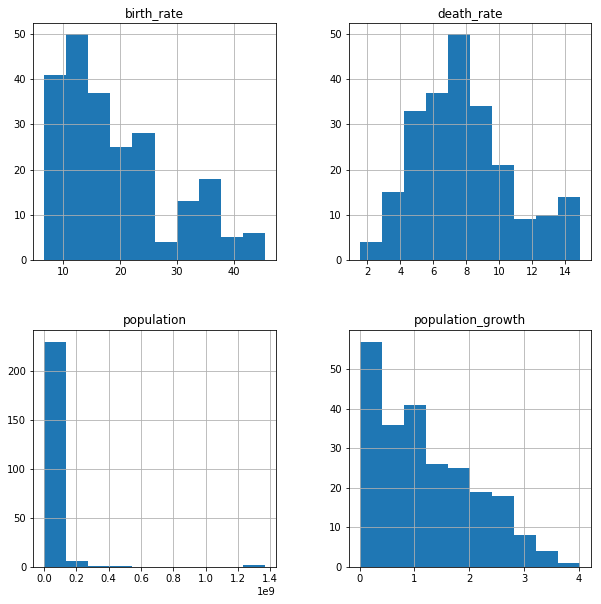

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data.hist(ax=ax)

## notes
histograms on the values population, birth_rate, death_rate, population growth.

In [10]:
q7 = "SELECT name, CAST(population as Float)/CAST(area_land as Float) AS density FROM facts;"
pd.read_sql_query(q7, conn)

,name,density
0,Afghanistan,49.927697
1,Albania,110.565662
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841
5,Antigua and Barbuda,209.131222
6,Argentina,15.870225
7,Armenia,108.370812
8,Australia,2.961485
9,Austria,105.107041


## notes
dataframe with the density by countries. below again a histogram on density.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef4e748>],
      dtype=object)

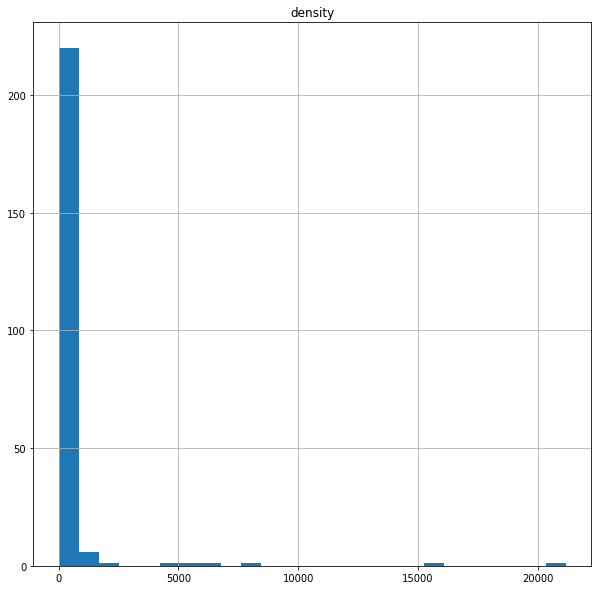

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q8 = "SELECT CAST(population as Float)/CAST(area_land as Float) AS density FROM facts;"
pd.read_sql_query(q8, conn).hist(ax=ax, bins=25)

## notes
there are some outliners with 4000 and more people/area_land. so below follows a query to get these countries.

In [12]:
q9 = "SELECT name, CAST(population as Float)/CAST(area_land as Float) AS density FROM facts WHERE density > 3000 ORDER BY density DESC;"
pd.read_sql_query(q9, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333


In [13]:
q10 = "SELECT name, CAST(area_water as Float)/CAST(area as Float) AS water_ratio FROM facts ORDER BY water_ratio DESC;"
pd.read_sql_query(q10, conn)

,name,water_ratio
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848
2,Puerto Rico,0.356827
3,"Bahamas, The",0.278818
4,Guinea-Bissau,0.221592
5,Malawi,0.205969
6,Netherlands,0.184147
7,Uganda,0.182287
8,Eritrea,0.141156
9,Liberia,0.135127


## notes
interesting: in the british indian ocean territory the water area is nearly 100%

wikipedia:
"The territory comprises the seven atolls of the Chagos Archipelago with over 1,000 individual islands – many very small – amounting to a total land area of 60 square kilometres (23 sq mi).
[...]
In 2010 545,000 square kilometres (210,426 sq mi) of ocean around the islands was declared a marine reserve."
https://en.wikipedia.org/wiki/British_Indian_Ocean_Territory